任务 2 数据分析与可视化

任务 2.1
绘制生鲜类商品和一般商品每天销售金额的折线图，并分析比较两类产品的销售状况。


In [17]:
import pandas as pd
sale = pd.read_csv('/Users/dingjiadong/Desktop/uber/task1_1.csv')


In [18]:
sale2_1 = sale.drop(sale[sale['商品类型'] == '联营商品'].index)

In [19]:
sale2_1['销售日期'] = pd.to_datetime(sale['销售日期'], format='%Y%m%d')
sale2_1.set_index(sale2_1['销售日期'],inplace=True)

In [20]:
sale2_1 = sale2_1[['商品类型','销售金额']]

In [21]:
fresh = sale2_1[sale2_1['商品类型'] == '生鲜']
general = sale2_1[sale2_1['商品类型'] == '一般商品']

In [22]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']


In [23]:
fresh = fresh.groupby(by = ['销售日期']).sum()

In [24]:
general = general.groupby(by = ['销售日期']).sum()

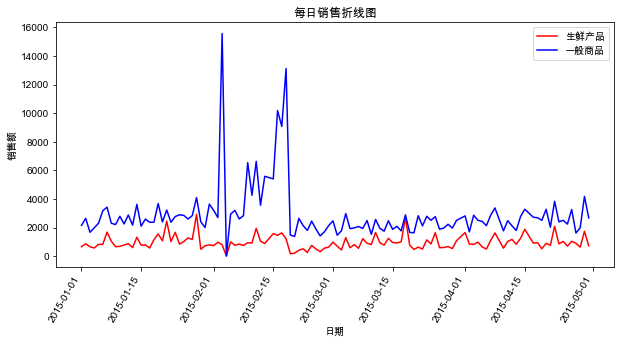

In [25]:
fig = plt.figure(figsize=(10,5))

plt.plot(fresh.index, fresh['销售金额'], color='red', label='生鲜产品')
plt.plot(general.index, general['销售金额'], color='blue', label='一般商品')

plt.title('每日销售折线图')
plt.xlabel('日期')
plt.ylabel('销售额')

plt.legend()

fig.autofmt_xdate(rotation = 60)
plt.show()


通过折线图可以发现，一般商品的销售额总体而言高于生鲜产品的销售额。生鲜产品销售额的波动相较于一般商品较小，一般商品的销售额在2015年2月1日至2015年2月20间呈现较大起伏，推测可能是由于春节假期导致的销售剧增。